In [1]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp

from pims import pipeline

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 6))
mpl.rc('image', cmap='gray')

@pipeline
def gray(image):
    return image[:, :, 1] #just take the green channel


frames=gray(pims.open('imagefile.png'))
frames
image=frames[0]
print(image)




[[255 255 255 ... 255 255 255]
 [255 239 210 ... 222 251 255]
 [255 186  55 ... 118 239 255]
 ...
 [255 184  50 ... 139 241 255]
 [255 244 225 ... 238 253 255]
 [255 255 255 ... 255 255 255]]


,y,x,mass,size,ecc,signal,raw_mass,ep,frame
0,15.229577,98.041475,1242.969044,4.524059,0.480832,20.828974,30752.0,-0.896113,0
1,16.906967,419.269754,1225.785140,4.657423,0.540953,19.266801,29486.0,-0.694645,0
2,68.882022,188.239530,1019.578294,4.188242,0.225875,19.266801,18453.0,-0.234733,0
3,69.756530,171.875311,1674.649537,4.487060,0.182080,26.036218,22667.0,-0.314183,0
4,70.993447,202.602475,1430.429813,4.381016,0.328895,21.870423,23102.0,-0.325558,0
...,...,...,...,...,...,...,...,...,...
258,363.617898,277.417295,1035.720749,4.282918,0.295683,19.787526,22949.0,-0.321464,0
259,366.402466,242.189344,1182.565019,4.948524,0.585791,23.432596,19881.0,-0.256733,0
260,376.441091,155.814277,897.208070,4.002901,0.187514,20.828974,14524.0,-0.189947,0
261,380.268056,413.823611,1124.764615,4.658525,0.493602,17.704628,28725.0,-0.611945,0


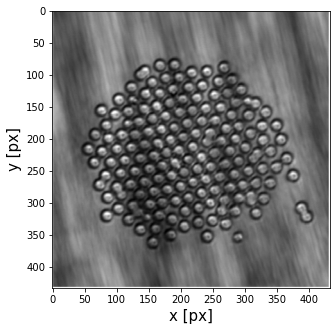

In [3]:
fig = plt.figure(figsize=(6.4,5.1))
plt.xlabel('x [px]', fontsize=15)
plt.ylabel('y [px]', fontsize=15)
fig = plt.figure(figsize=(6.4,5.1))
plt.xlabel("x [px]",fontsize=15)
plt.ylabel("y [px]", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.imshow(image) 
fig.savefig("Image_chosen.pdf", bbox_inches='tight')
fig.savefig("Image_chosen.png", bbox_inches='tight')

f_1 = tp.locate(frames[0], 17, invert=False, minmass=20, percentile=75, separation=5)
#start with "21", minmass, and invert to tune particles in system. If these don't sufficiently locate particles, add percentile and separation
#21=diameter parameter, has to be an odd number
#minmass=minimum integrated brightness eliminates spurious feacture, can be any float number
#invert=True is features are darker than background, otherwise True=False. False is the default
#percentile=further excludes particles that are darker than the pixels withing the chosen percentile
#seaparation=sets the minimum separation between features
#located features can be seen in next code block.
f_1

0       15.229577
1       16.906967
2       68.882022
3       69.756530
4       70.993447
          ...    
256    365.041438
259    366.402466
260    376.441091
261    380.268056
262    415.157346
Name: y, Length: 263, dtype: float64


263

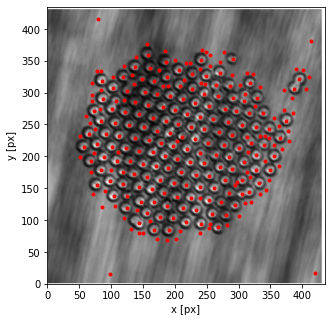

In [4]:
#plots located points on top of frame to view particle selection
a=f_1.sort_values(by=['y'])
fig = plt.figure(figsize=(6.4,5.1))
plt.imshow(frames[0], cmap='gray')
plt.xlabel('x [px]') 
plt.ylabel('y [px]')
plt.xlim((0,435)) #adjust for window size
plt.ylim((0,435)) #adjust for window size
plt.plot(a['x'][0:],a['y'][0:], 'r.')
plt.xlabel('x [px]', fontsize=15)
plt.ylabel('y [px]', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.savefig('located_particles.pdf',bbox_inches='tight')
fig.savefig('located_particles.png',bbox_inches='tight')

print(a['y'][0:])
len(a['y'][0:])

In [4]:
import numba
#puts particles into cordinates and stores in an hdf file. 
#tuning has to be the same as above 
#can take awhile to run through each frame and feature
#glitches if run with same file name too many times. May need to switch file name if it stops working.

t = tp.batch(frames, 17, invert=False, minmass=20, percentile=75, separation=5, engine='numba', characterize=True, output=tp.PandasHDFStore('data_colloids_image.h6', mode='a', t_column='frame'))

Frame 0: 263 features


In [5]:
#imports hdf file
import h5py
with h5py.File('data_colloids_image.h6', "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    data = list(f[a_group_key])

Keys: <KeysViewHDF5 ['Frame_0']>


L
1
hdf_alter
[[ 98.04147465  15.22957687]
 [419.26975361  16.90696686]
 [188.23953013  68.88202247]
 [171.87531095  69.75652985]
 [202.60247543  70.9934474 ]
 [143.7903602   79.55532521]
 [149.9908353   79.83215501]
 [239.58762598  79.92217245]
 [190.8395469   84.04234026]
 [208.65348772  82.58458063]
 [131.07165109  85.80329328]
 [254.07561114  87.04889142]
 [168.01455779  84.7793345 ]
 [240.89463923  94.38647002]
 [267.07712731  88.52542148]
 [282.06338028  91.63380282]
 [217.52266075  96.19467849]
 [254.48396417  93.78243282]
 [160.89499285  98.44463519]
 [176.88451659 104.36895099]
 [197.8572337  103.36438792]
 [143.2013373   95.39607066]
 [120.92969064 103.61952591]
 [280.66744457 107.28471412]
 [156.31644731 111.28917716]
 [258.76477262 110.04311241]
 [300.60202962 106.61821174]
 [233.50787368 115.88322864]
 [139.94384739 115.19344438]
 [124.26522476 118.56443736]
 [213.20317677 118.71896317]
 [ 86.23019017 120.19730586]
 [187.28424557 121.67286791]
 [106.66134865 122.47138907]


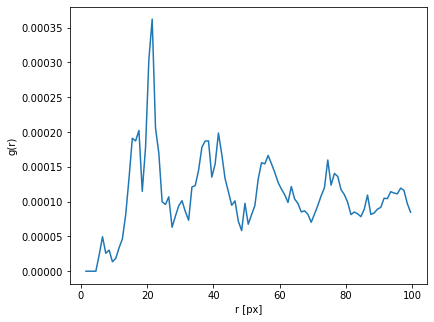

In [7]:
#added from https://stackoverflow.com/questions/59236066/python-calculation-of-lennardjones-2d-interaction-pair-correlation-distribution
#Radial Distribution
L=len(frames)
print('L')
print(L)
for x in range(0,L):
    Frame='Frame_'+str(x)
    #print(Frame)
    hdf=pd.read_hdf('data_colloids_image.h6', key=Frame)
    #print(hdf)
    df=pd.DataFrame(hdf)
    features = ['x','y']
    hdf_alter= df.loc[:,features].values
print('hdf_alter')
print(hdf_alter)

from scipy.spatial.distance import *



def distmatrix(posarray):
    return cdist(posarray, posarray, 'euclidean')

N=len(hdf_alter)
b = f_1[['y','x']][:1600].values
dist = distmatrix(b) #if distance larger than 1/2 box length then shift distance 



def RDF(N,particles, L):
    minb=1 
    maxb=100 # adjust to tune bin max 
    nbin=100 # adjust to tune number of bin
    width=(maxb-minb)/(nbin)
    rings=np.linspace(minb, maxb,nbin)
    skata=np.asarray(dist).flatten()
    rDf = np.histogram(skata, rings ,density=True)
    prefactor = (1/( np.pi*(L**2/N**2)))
    rDf = [prefactor*rDf[0], 0.5*(rDf[1][1:]+rDf[1][:-1])]
    rDf[0]=np.multiply(rDf[0],1/(rDf[1]*( width )))

    fig = plt.figure(figsize=(6.4,5.1))
    plt.plot(rDf[1],rDf[0])
    plt.xlabel("r [px]")
    plt.ylabel("g(r)")



    plt.show()
    fig.savefig('pair_correlation_plot.pdf', bbox_inches='tight')
    fig.savefig('pair_correlation_plot.png', bbox_inches='tight')
    return rDf

rDf=RDF(N,dist, 200)


<ipython-input-8-3d9a396634eb>:1: RuntimeWarning: divide by zero encountered in log
  DG=np.log(100000*rDf[0])*(-8.314*300)/1000 #KJ/mol


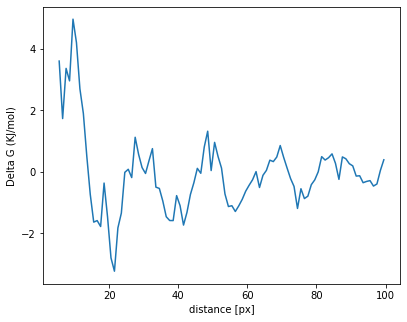

In [8]:
DG=np.log(100000*rDf[0])*(-8.314*300)/1000 #KJ/mol
fig = plt.figure(figsize=(6.4,5.1))
plt.plot(rDf[1],DG-np.mean(DG[-20]))
plt.xlabel("distance [px]")
plt.ylabel("\Delta G (KJ/mol)")
fig.savefig('pair_potential_of_mean_force.pdf', bbox_inches='tight')
fig.savefig('pair_potential_of_mean_force.png', bbox_inches='tight')


c
[[  0.         321.23265842 104.948912   ... 365.80248053 482.67115992
  400.32303137]
 [321.23265842   0.         236.80449862 ... 445.72813961 363.40190044
  523.00422529]
 [104.948912   236.80449862   0.         ... 309.26360556 384.51194935
  362.72159636]
 ...
 [365.80248053 445.72813961 309.26360556 ...   0.         258.03771416
   84.89959668]
 [482.67115992 363.40190044 384.51194935 ... 258.03771416   0.
  335.38686346]
 [400.32303137 523.00422529 362.72159636 ...  84.89959668 335.38686346
    0.        ]]


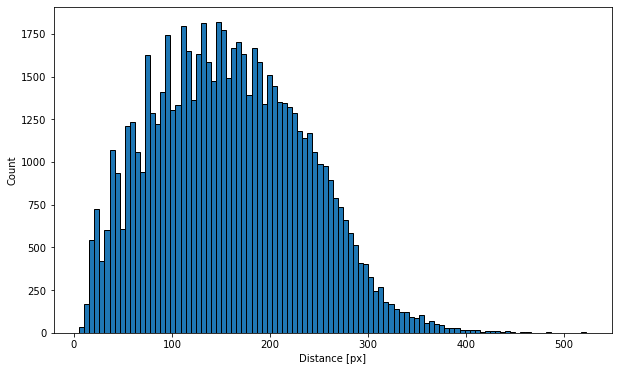

In [9]:
#Pair Correlation distances
c=cdist(hdf_alter, hdf_alter, 'euclidean')
print('c')
print(c)

fig, ax=plt.subplots()
ax.hist(c[np.nonzero(c)], bins=100, edgecolor='black')
ax.set(xlabel='Distance [px]', ylabel='Count')
fig.savefig('pair_distance_histogram.pdf', bbox_inches='tight')
fig.savefig('pair_distance_histogram.png', bbox_inches='tight')

In [10]:
#Triple Correlation
from numba import jit


@jit
def trip(N,c):
    #d_t=np.zeros((700000000))
    storage=np.zeros((700000000))
    counter=0

    for i in range (1,N):
        #if c[i][j]<20
        for j in range (i+1,N):
            #if c[i][k]<20
            for k in range (j+1,N):
                #d_t= dij+dik+djk#
                storage[counter]= c[i][j]+c[i][k]+c[j][k]
                counter=counter+1
                #put into histogram wont call as much memory
                #only find those within a certain distance
                #won't need storage
                if counter%1000000 == 0:
                    print(counter, i,j,k)
               
 

    return storage
storage= trip(N,c)
print('storage')
print(storage)
#print(counter)
#print(len(storage))
#Tetrahedral number
#scaling might be cubed




1000000 34 96 213
2000000 82 141 162
storage
[506.16852265 474.63785633 565.03037607 ...   0.           0.
   0.        ]


(0.0, 100000.0)

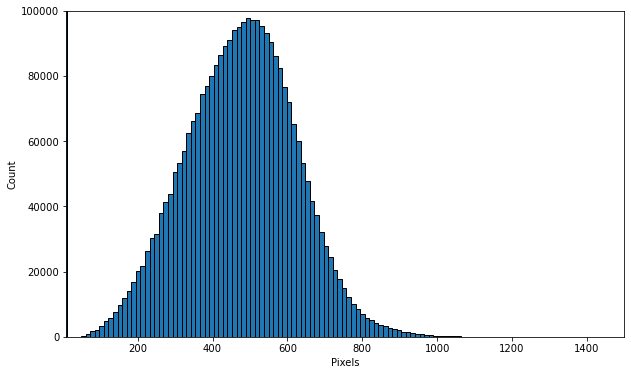

In [11]:
fig, ax=plt.subplots()
ax.hist(storage, bins =100, edgecolor="black")
ax.set(xlabel='Pixels', ylabel='Count')
fig.savefig('triplet_distance_histogram.pdf', bbox_inches='tight')
fig.savefig('triplet_distance_histogram.png', bbox_inches='tight')
ax.set_xlim([10,1500]) #adjust based on system
ax.set_ylim([0,100000]) #adjust based on system

c
[[  0.         321.23265842 104.948912   ... 365.80248053 482.67115992
  400.32303137]
 [321.23265842   0.         236.80449862 ... 445.72813961 363.40190044
  523.00422529]
 [104.948912   236.80449862   0.         ... 309.26360556 384.51194935
  362.72159636]
 ...
 [365.80248053 445.72813961 309.26360556 ...   0.         258.03771416
   84.89959668]
 [482.67115992 363.40190044 384.51194935 ... 258.03771416   0.
  335.38686346]
 [400.32303137 523.00422529 362.72159636 ...  84.89959668 335.38686346
    0.        ]]
263


<ipython-input-13-d0fef0f05a1b>:8: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "genhistogram" failed type inference due to: No implementation of function Function(<function append at 0x000001A87BA454C0>) found for signature:
 
 >>> append(array(int64, 2d, C), list(list(float64)), axis=Literal[int](0))
 
There are 2 candidate implementations:
     - Of which 1 did not match due to:
     Overload in function 'np_append': File: numba\np\arrayobj.py: Line 1709.
       With argument(s): '(array(int64, 2d, C), list(list(float64)), axis=Literal[int](0))':
      Rejected as the implementation raised a specific error:
        TypingError: Failed in nopython mode pipeline (step: nopython frontend)
      No implementation of function Function(<function concatenate at 0x000001A87B8AA040>) found for signature:
       
       >>> concatenate(Tuple(array(int64, 2d, C), list(list(float64))), axis=Literal[int](0))
       
      There are 2 candida

C:\Users\flipp\anaconda3\lib\site-packages\numba\core\object_mode_passes.py:177: NumbaWarning: Function "genhistogram" was compiled in object mode without forceobj=True.

File "<ipython-input-13-d0fef0f05a1b>", line 19:
def genhistogram(N,c,b):
    <source elided>

    for i in range (0,N):
    ^

  warnings.warn(errors.NumbaWarning(warn_msg,
C:\Users\flipp\anaconda3\lib\site-packages\numba\core\object_mode_passes.py:187: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compilation path has been detected, this is deprecated behaviour.

For more information visit http://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit

File "<ipython-input-13-d0fef0f05a1b>", line 19:
def genhistogram(N,c,b):
    <source elided>

    for i in range (0,N):
    ^

  warnings.warn(errors.NumbaDeprecationWarning(msg,


STORAGE 2
[[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  2.   2.   2.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   2.   3.   2.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   9.   3.   3.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   7.   8.   3.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   8.   8.   2.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   8.  12.   2.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   8.  11.   3.   0.]
  [  0.   0.   0.   0.   0.   0.   0.  11.   6.   5.]
  [  0.   0.   0.   0.   0.   0.   0.   0.  10.  19.]]

 [[  0.   3.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  2.   8.  11.   5.   0.   0.   0.   0.   0.   0.]
  [  2.  20.  46.  15.   6.   0.   0.   0.   0.   0.]
  [  0.  44.  90.  19.  17.   8.   0.   0.   0.   0.]
  [  0.   0.  61.  74.  52.  32.   9.   0.   0.   0.]
  [  0.   0.   0.  79.  92.  46.  41.   9.   0.   0.]
  [  0.   0.   0.   0.  77. 125.  48.  38.  16.   0.]
  [  0.   0.   0.   0.   0.  79. 109.  70.  43.  12.]
  [  0.   0.   0

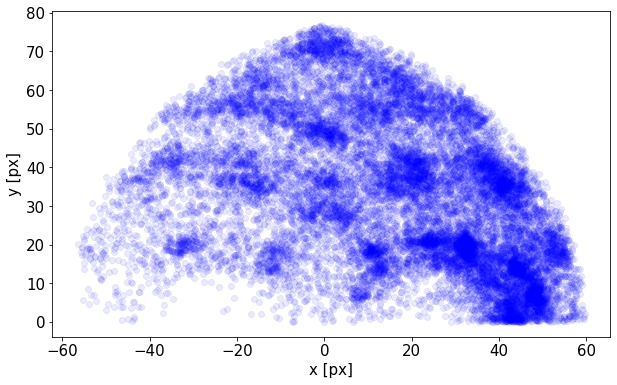

In [13]:

c=cdist(hdf_alter, hdf_alter, 'euclidean')
print('c')
print(c)
from numba import jit
N=len(hdf_alter)
print(N)
b= 10 #number of bins
@jit
def genhistogram(N,c,b):
    storage=np.zeros((b,b,b))
    storage3=np.zeros((4*b))
    storage4=np.array([[0,0]])
    counter=0
    bmin= 0
    bmax= 80 #based off of pixels
    bwidth= (bmax-bmin)/b


    for i in range (0,N):
        for j in range (i+1,N):
            if c[i][j]<bmax and c[i][j]>1:
                for k in range (j+1,N):
                    if c[i][k]<bmax and c[j][k]<bmax and c[i][k]>1 and c[j][k]>1:
                        #d_t= dij+dik+djk#
                        l = np.floor((c[i][j]-bmin)/bwidth) 
                        m = np.floor((c[i][k]-bmin)/bwidth)
                        n = np.floor((c[j][k]-bmin)/bwidth)
                        r = c[i][j]
                        s = c[i][k]
                        t = c[j][k]
                        o = np.floor(((r + s + t)-bmin)/bwidth)
                        dV=8*np.pi**2*(bwidth**3)*r*s*t
                        storage3[np.int(o)] = storage3[np.int(o)] + (1/dV)
                        x = (t**2-s**2)/(-2*r) #centered on origin for length r 
                        y = np.sqrt(s**2-(x+(r/2))**2)
                        if r>40 and r<60: #pixel range for r and be changed as needed/wanted
                            #creates triangle distribution                            
                            storage4=np.append(storage4,[[x,y]], axis=0)
                        storage[np.int(l)][np.int(m)][np.int(n)]= storage[np.int(l)][np.int(m)][np.int(n)] + 1   
                        counter=counter+1
                        
    return storage, storage3, storage4
storage2,storage3, storage4= genhistogram(N,c,b)
print('STORAGE 2')
print(storage2)
print('Storage 3')
print(storage3)

#Triangle distribution plot
plt.plot(storage4[:,0],storage4[:,1], "bo", alpha=0.08) #alpha is transparancy and adjust r range
plt.xlabel("x [px]",fontsize=15)
plt.ylabel("y [px]", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.savefig('Triangle_distribution_plot.pdf', bbox_inches='tight')
plt.savefig('Triangle_distribution_plot.png', bbox_inches='tight')

plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

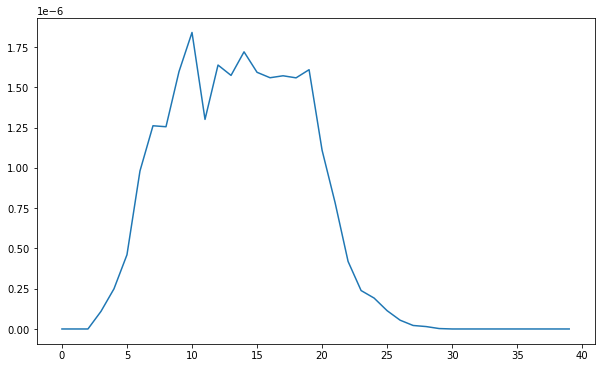

In [15]:
#triplet correlation plot 
plt.plot(storage3)
plt.savefig('triplet_correlation_plot.pdf', bbox_inches='tight')

plt.show


<ipython-input-17-dba68b75ad93>:4: RuntimeWarning: divide by zero encountered in log
  Free_Energy=(-R*T*np.log((storage3))) - 35000 #J/mol, shift down to center around 0


40


<function matplotlib.pyplot.show(*args, **kw)>

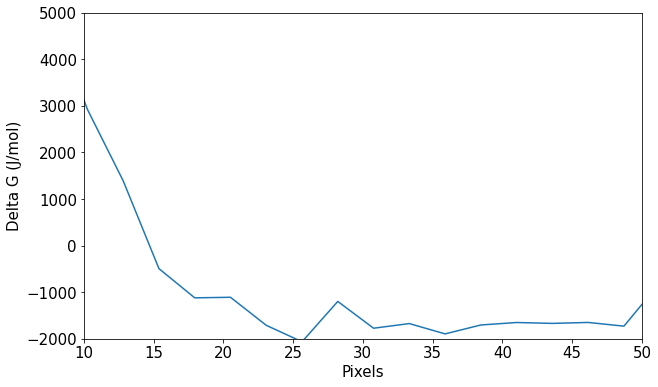

In [17]:
#triplet potential of mean force/free energy
R=8.314 #J/Kmol, ideal gas constant
T=300 #K, Standard Air Temp, Change if you know the temp of your colloidal solution
Free_Energy=(-R*T*np.log((storage3))) - 35000 #J/mol, shift down to center around 0
N = len(Free_Energy)
print(N)
x = np.linspace(0, N*2.5,40)
plt.plot(x, Free_Energy)


plt.xlim([10,50]) #adjust based on system
plt.ylim([-2000,5000]) #adjust based on system
plt.xlabel("Pixels",fontsize=15)
plt.ylabel("Delta G (J/mol)", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.savefig('Triplet_potential_of_mean_force.pdf', bbox_inches='tight')
plt.savefig('Triplet_potential_of_mean_force.png', bbox_inches='tight')
plt.show